## Yulu - Hypothesis Testing

#### Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

# 1.) Define Problem Statement and perform Exploratory Data Analysis 

## 1.1) Defining Problem Statement

#### 1.) Trying to establish relationship between dependent and independent variables in dataset.
#### 2.) Checking whether Working Day has effect on number of electric cycles rented
#### 3.) Checking whether No. of cycles rented similar or different in different seasons
#### 4.) Checking whether No. of cycles rented similar or different in different weather
#### 5.) Checking if Weather is dependent on season
#### 6.) Providing Business insights and recommendations based on data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1.2) Usual Exploratory Data Analysis

In [3]:
# Shape of dataset

print('No. of rows in dataset :',df.shape[0])
print('No. of columns in dataset :',df.shape[1])

No. of rows in dataset : 10886
No. of columns in dataset : 12


In [4]:
# data type of attributes

df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
# Conversion of datetime from object to datetime

df['datetime']=pd.to_datetime(df['datetime'])

In [6]:
# missing value detection

for columns in df.columns:
    print(f' The no. of nan values in column {columns} is ',df[columns].isna().sum())

 The no. of nan values in column datetime is  0
 The no. of nan values in column season is  0
 The no. of nan values in column holiday is  0
 The no. of nan values in column workingday is  0
 The no. of nan values in column weather is  0
 The no. of nan values in column temp is  0
 The no. of nan values in column atemp is  0
 The no. of nan values in column humidity is  0
 The no. of nan values in column windspeed is  0
 The no. of nan values in column casual is  0
 The no. of nan values in column registered is  0
 The no. of nan values in column count is  0


In [7]:
# Statistical Summary

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 1.3) Univariate Analysis

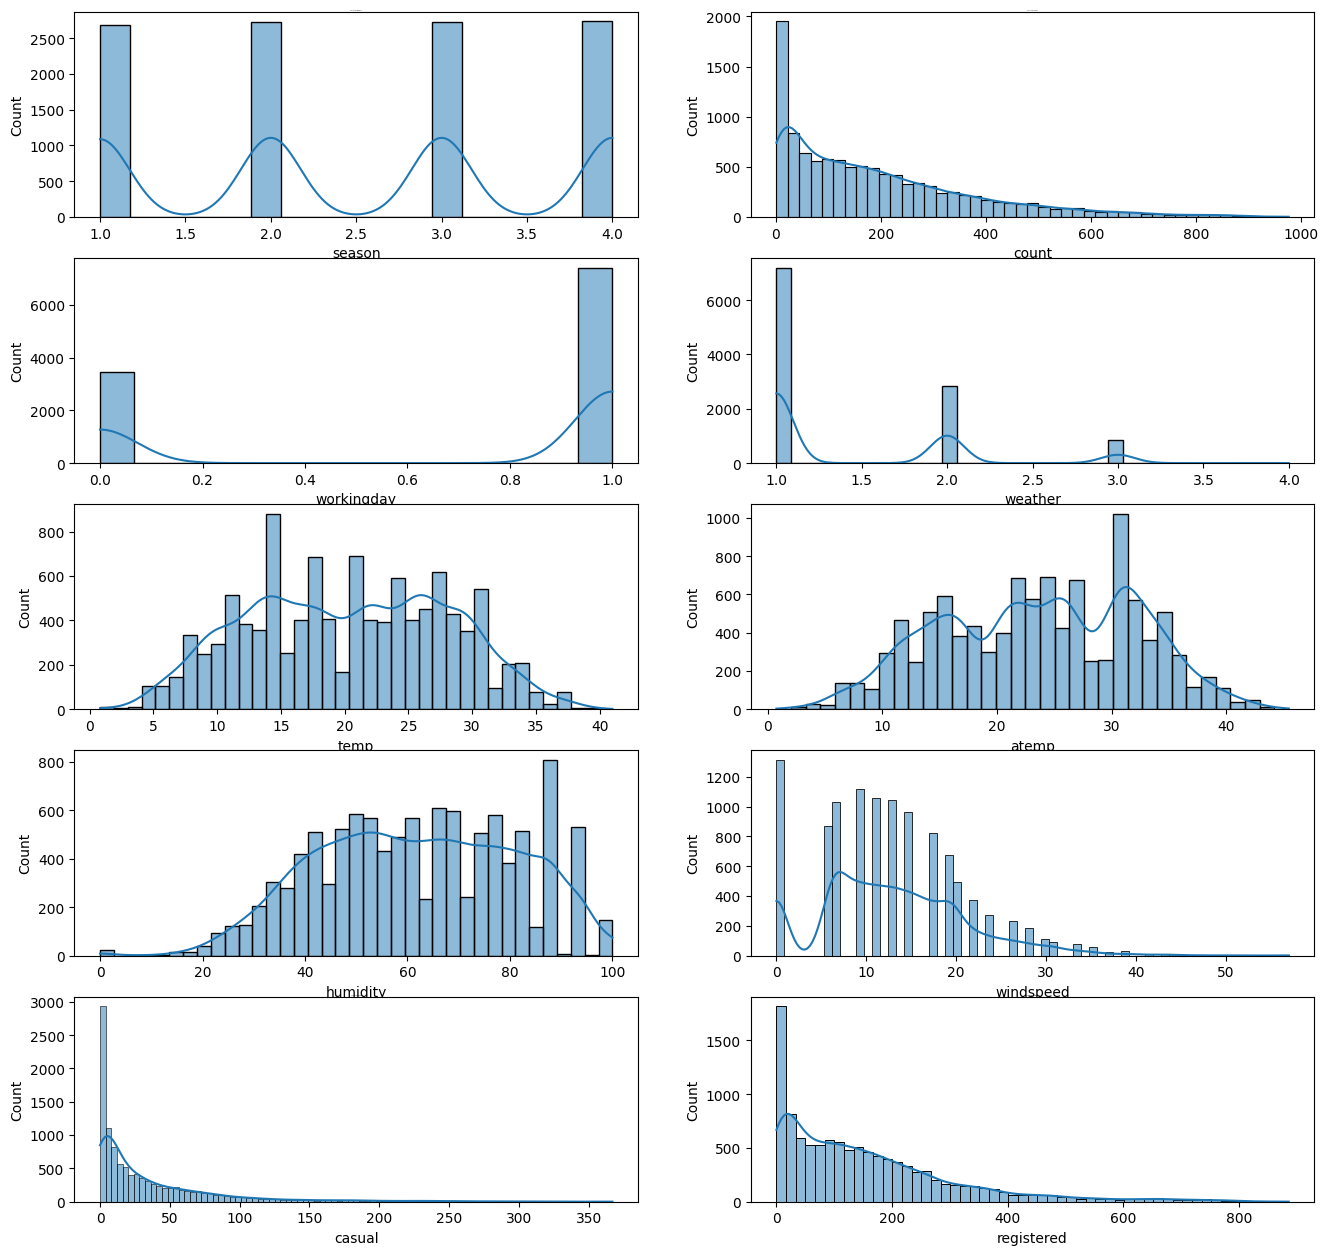

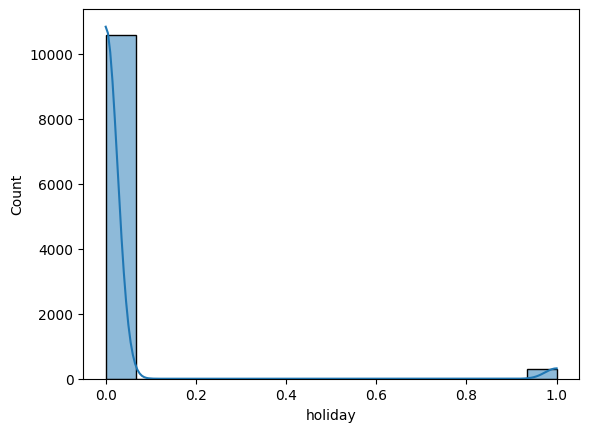

In [8]:
temp_cols=['season','count','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','holiday']

fig,axis = plt.subplots(nrows=5,ncols=2,figsize=(16,10))
fig.subplots_adjust(top=1.3)
index=0

for i in range(5):
    for j in range(2):
        sns.histplot(df[temp_cols[index]],ax=axis[i,j],kde=True)
        axis[i,j].set_title(f'count vs {temp_cols[index]}',pad=1,fontsize=1)
        index=index+1

plt.show()
sns.histplot(df[temp_cols[-1]], kde=True) 
plt.show()

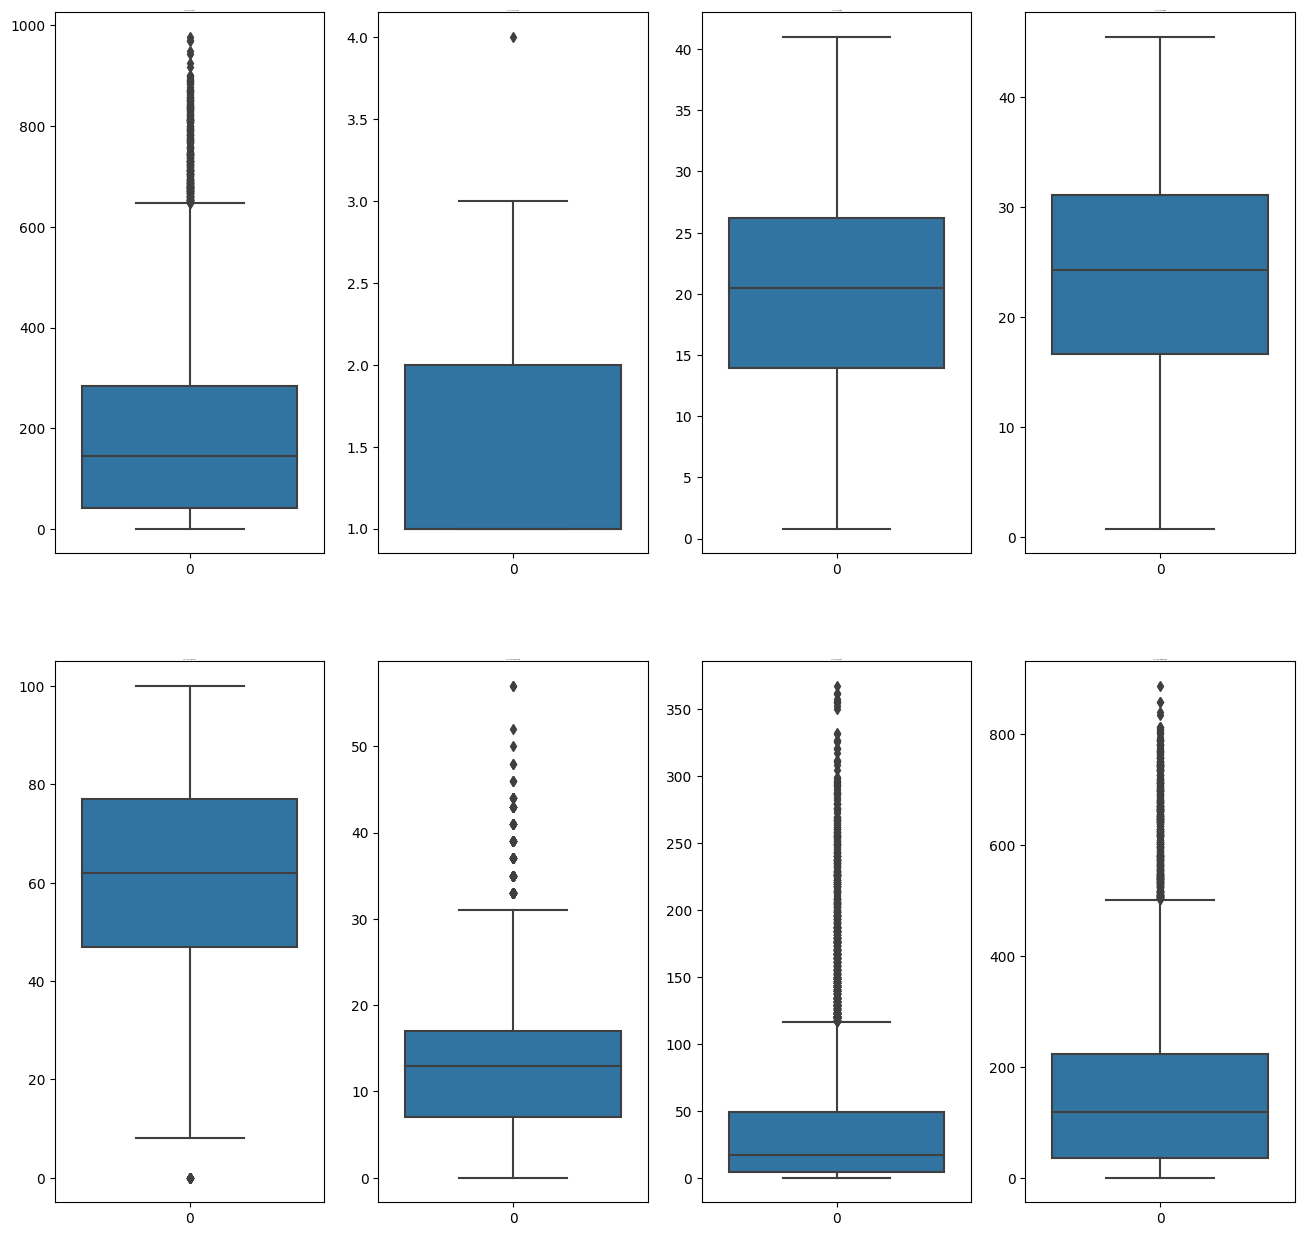

In [9]:
# Outlier Detection with Boxplots

temp_cols=['count','weather','temp','atemp','humidity','windspeed','casual','registered']

fig,axis = plt.subplots(nrows=2,ncols=4,figsize=(16,10))
fig.subplots_adjust(top=1.3)
index=0

for i in range(2):
    for j in range(4):
        sns.boxplot(df[temp_cols[index]],ax=axis[i,j])
        axis[i,j].set_title(f'count vs {temp_cols[index]}',pad=1,fontsize=1)
        index=index+1

plt.show()


## 1.4) Bivariate Analysis

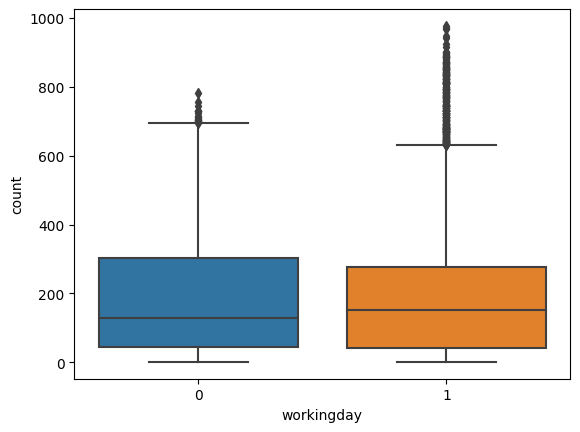

In [10]:
# Relationship between Workingday and count

sns.boxplot(data=df,x='workingday',y='count')
plt.show()

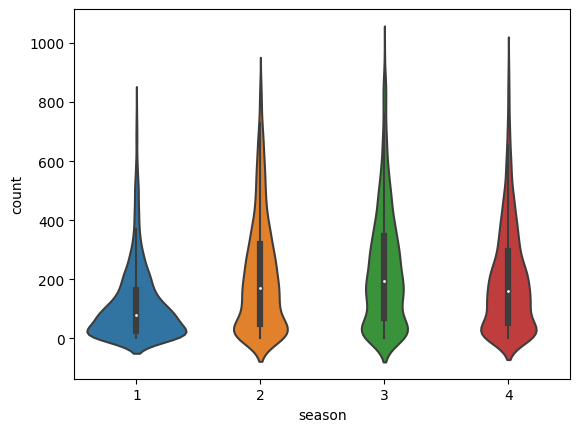

In [11]:
# Relationship between season and count

sns.violinplot(data=df,x='season',y='count')
plt.show()

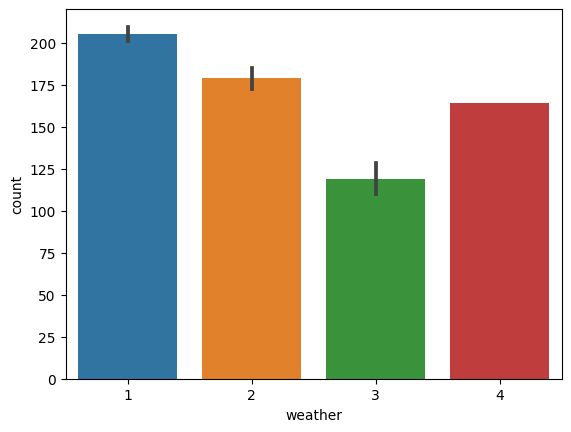

In [12]:
# Relationship between weather and count

sns.barplot(data=df,x='weather',y='count')
plt.show()

## 1.5) Illustrate insights based on EDA

  #### 1.5.1) Comments on range of attributes, outliers of various attributes

In [39]:
for columns in df.columns:
    print(f'range of column {columns} lies in range [{df[columns].min()},{df[columns].max()}]')

range of column datetime lies in range [2011-01-01 00:00:00,2012-12-19 23:00:00]
range of column season lies in range [1,4]
range of column holiday lies in range [0,1]
range of column workingday lies in range [0,1]
range of column weather lies in range [1,4]
range of column temp lies in range [0.82,41.0]
range of column atemp lies in range [0.76,45.455]
range of column humidity lies in range [0,100]
range of column windspeed lies in range [0.0,56.9969]
range of column casual lies in range [0,367]
range of column registered lies in range [0,886]
range of column count lies in range [1,977]


### 1.5.2) Comment on Outlier

#### The highest no. of outlier present is in column 'casual' followed by 'registered' , 'windspeed' and 'count'.

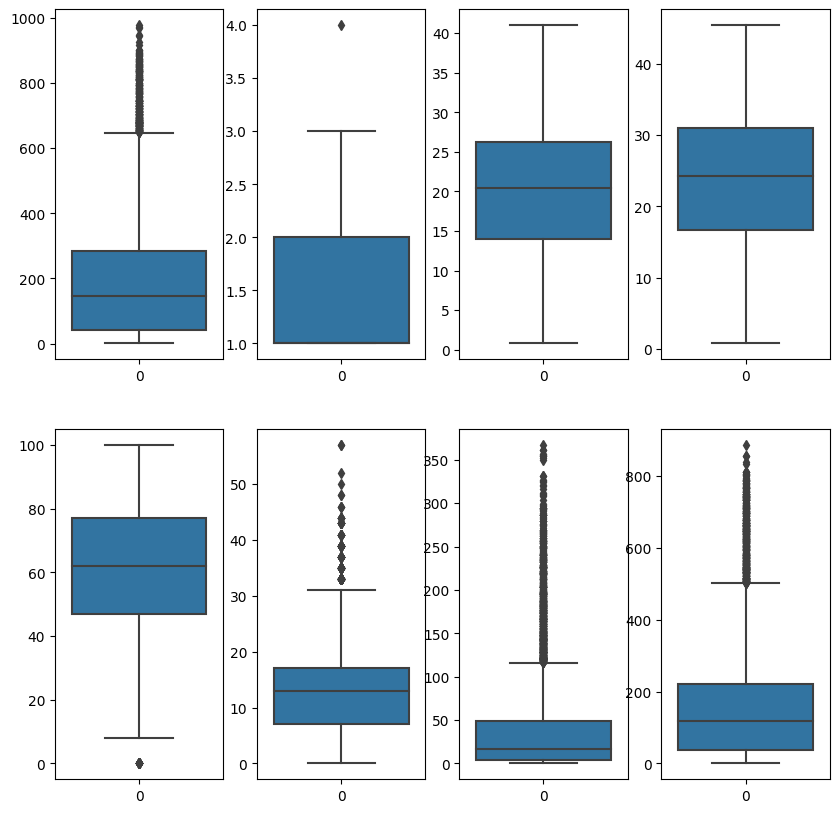

In [40]:
temp_cols=['count','weather','temp','atemp','humidity','windspeed','casual','registered']

fig,axis = plt.subplots(nrows=2,ncols=4,figsize=(10,10))
index=0

for i in range(2):
    for j in range(4):
        sns.boxplot(df[temp_cols[index]],ax=axis[i,j])
        index=index+1

plt.show()

### 1.5.3) Comments on the distribution of the variables and relationship between them

#### 1. From above graphs we can see that distribution of 'count' and 'registered' has a log-normal distribution.
#### 2. 'temp' and 'atemp' are more or less normally(gaussian) distributed.
#### 3. 'casual' also follow a log-normal distribution with right skewness

## 1.5.4) Comments for each univariate and bivariate plots

#### 1.) Both mean and median of workinday 1 is greater than workingday 0 w.r.t count.
#### 2.) Medians of seasons can be arranged in following order 3 > 2 > 4 > 1.
#### 3.) Count of weather is distributed as following 1 > 2 > 4 > 3 .
#### 4.) Temp is mainly distributed in between 15 degrees to 30 degrees.
#### 5.) atemp is mainly distributed in between 10 degrees to 38 degrees.
#### 6.) windspeed is mainly distributed between 0 to 20.

# 2.) Hypothesis Testing

### 2.1) 2- Sample T-Test to check if Working Day has an effect on the number of electric cycle rented

In [44]:
from scipy.stats import ttest_ind,f_oneway,chi2_contingency,chi2

#### H0(Null Hypothesis) : workingday has no effect on the number of electric cycles rented 
 
#### Ha(Alternate Hypothesis) : workingday has effect on the number of electric cycles rented 
 
#### Significance Level : 0.05

In [16]:
working_day = df[df['workingday']==1]['count']
non_working_day = df[df['workingday']==0]['count']

In [38]:
# Using 2 sample t-test

test_stats,p_val = ttest_ind(working_day,non_working_day,alternative='two-sided')
print('Test Statistics is : ',test_stats)
print('')
print('p_value is :',p_val)
print('')

if p_val<0.05:
    print('Since p_value is less than significance value(0.05) so we REJECT THE NULL HYPOTHESIS')
    print('\n')
    print('Hence , workingday has effect on the number of electric cycles rented')
else:
    print('Since p_value is more than significance value(0.05) so we FAIL TO REJECT THE NULL HYPOTHESIS')
    print('\n')
    print('Hence , workingday has NO significant effect on the number of electric cycles rented')

Test Statistics is :  1.2096277376026694

p_value is : 0.22644804226361348

Since p_value is more than significance value(0.05) so we FAIL TO REJECT THE NULL HYPOTHESIS


Hence , workingday has NO significant effect on the number of electric cycles rented


#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2.2) ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season 

#### H0 (Null Hypothesis) : No. of Cycles rented is similar in different weather
 
#### Ha (Alternate Hypothesis) : No. of Cycles rented is different in different weather
 
#### Significance Level : 0.05

In [22]:
# Different weather categories

a1=df[df['weather']==1]['count']
a2=df[df['weather']==2]['count']
a3=df[df['weather']==3]['count']
a4=df[df['weather']==4]['count']

In [41]:
# Conducting one-way ANNOVA test for weather

test_stats,p_val = f_oneway(a1,a2,a3,a4)
print('Test Statistics is : ',test_stats)
print('')
print('p_value is :',p_val)
print('')

if p_val<0.05:
    print('Since p_value is less than significance value(0.05) so we REJECT THE NULL HYPOTHESIS i.e. Alternate Hypothesis accepted')
    print('\n')
    print('Hence , No. of Cycles rented is different in different weather')
else:
    print('Since p_value is more than significance value(0.05) so we FAIL TO REJECT THE NULL HYPOTHESIS')
    print('\n')
    print('Hence , No. of Cycles rented is similar in different weather')

Test Statistics is :  65.53024112793271

p_value is : 5.482069475935669e-42

Since p_value is less than significance value(0.05) so we REJECT THE NULL HYPOTHESIS i.e. Alternate Hypothesis accepted


Hence , No. of Cycles rented is different in different weather


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### H0 (Null Hypothesis) : No. of Cycles rented is similar in different season
 
#### Ha (Alternate Hypothesis) : No. of Cycles rented is different in different season
 
#### Significance Level : 0.05

In [29]:
# Different season categories

b1=df[df['season']==1]['count']
b2=df[df['season']==2]['count']
b3=df[df['season']==3]['count']
b4=df[df['season']==4]['count']

In [42]:
# Conducting one-way ANNOVA test for season

test_stats,p_val = f_oneway(b1,b2,b3,b4)
print('Test Statistics is : ',test_stats)
print('p_value is :',p_val)
print('')

if p_val<0.05:
    print('Since p_value is less than significance value(0.05) so we REJECT THE NULL HYPOTHESIS i.e. Alternate Hypothesis Accepted')
    print('\n')
    print('Hence , No. of Cycles rented is different in different season')
else:
    print('Since p_value is more than significance value(0.05) so we FAIL TO REJECT THE NULL HYPOTHESIS')
    print('\n')
    print('Hence , No. of Cycles rented is similar in different season')

Test Statistics is :  236.94671081032106
p_value is : 6.164843386499654e-149

Since p_value is less than significance value(0.05) so we REJECT THE NULL HYPOTHESIS i.e. Alternate Hypothesis Accepted


Hence , No. of Cycles rented is different in different season


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2.3) Chi-square test to check if Weather is dependent on the season

#### Null Hypothesis (H0): Weather is not dependent of the season

#### Alternate Hypothesis (Ha): Weather is dependent of the season

#### Significance level (alpha): 0.05

In [33]:
data = pd.crosstab(df['weather'],df['season'])
print('obseved values :')
print('\n')
print(data)

obseved values :


season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


In [46]:
# Applying Chisquare test to detemine dependency of weather on season

test_stats,p_val,dof,expected_array = chi2_contingency(data)
print('Test Statistics :',test_stats)
print('')
print('p-value :',p_val)
print('')
print('Degree Of Freedom :',dof)
print('')
print('Expected Frequency Array :',expected_array)
print('')

# Critical Value

critical_val=chi2.ppf(q=0.95,df=dof)
print('The Critical Value is :',critical_val)
print('')

# Testing of accepting/rejecting the null hypothesis

if p_val<0.05:
    print('Since p_value is less than significance value(0.05) so we REJECT THE NULL HYPOTHESIS i.e. Alternate Hypothesis Accepted')
    print('\n')
    print('Hence, We can say that Weather is dependent of the season')
else:
    print('Since p_value is greater than significance value(0.05) so we FAIL TO REJECT THE NULL HYPOTHESIS')
    print('\n')
    print('Hence, We can say that Weather is not dependent of the season')

Test Statistics : 49.15865559689363

p-value : 1.5499250736864862e-07

Degree Of Freedom : 9

Expected Frequency Array : [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]

The Critical Value is : 16.918977604620448

Since p_value is less than significance value(0.05) so we REJECT THE NULL HYPOTHESIS i.e. Alternate Hypothesis Accepted


Hence, We can say that Weather is dependent of the season


### Inferences Drawn on Hypothesis Testing

#### 1.) Workingday has no effect on the number of electric cycles rented as we FAILED TO REJECT NULL HYPOTHESIS via 2 sample t-test.
#### 2.) No. of Cycles rented is different in different weather and season as we REJECTED NULL HYPOTHESIS via ANNOVA test.
#### 3.) Weather is dependent of the season as we REJECTED NULL HYPOTHESIS via Chi-square test.